In [318]:
!pip install scikit-surprise

In [319]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import surprise

In [320]:
from surprise.model_selection import train_test_split
from surprise.model_selection import cross_validate
from surprise.model_selection import KFold
from surprise import NormalPredictor
from surprise import BaselineOnly
from surprise import KNNWithMeans
from surprise import KNNBaseline
from surprise import KNNBasic
from surprise import SVD
from surprise import SVDpp
from surprise import NMF
from surprise import SlopeOne
from surprise import CoClustering 
from sklearn.metrics.pairwise import cosine_similarity

#  Data collection

In [321]:
df = pd.read_csv('D:/Om Data Science/book10.csv', encoding='latin-1')

In [322]:
df

,Unnamed: 0,User.ID,Book.Title,Book.Rating
0,1,276726,Classical Mythology,5
1,2,276729,Clara Callan,3
2,3,276729,Decision in Normandy,6
3,4,276736,Flu: The Story of the Great Influenza Pandemic...,8
4,5,276737,The Mummies of Urumchi,6
...,...,...,...,...
9995,9996,162121,American Fried: Adventures of a Happy Eater.,7
9996,9997,162121,Cannibal In Manhattan,9
9997,9998,162121,How to Flirt: A Practical Guide,7
9998,9999,162121,Twilight,8


In [323]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   10000 non-null  int64 
 1   User.ID      10000 non-null  int64 
 2   Book.Title   10000 non-null  object
 3   Book.Rating  10000 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 312.6+ KB


In [324]:
#data = df.align(df, join="outer", axis=1)
#data

In [325]:
df.head()

,Unnamed: 0,User.ID,Book.Title,Book.Rating
0,1,276726,Classical Mythology,5
1,2,276729,Clara Callan,3
2,3,276729,Decision in Normandy,6
3,4,276736,Flu: The Story of the Great Influenza Pandemic...,8
4,5,276737,The Mummies of Urumchi,6


In [326]:
df.shape

(10000, 4)

In [327]:
df.describe()

,Unnamed: 0,User.ID,Book.Rating
count,10000.00000,10000.000000,10000.00000
mean,5000.50000,95321.249800,7.56630
std,2886.89568,117645.703609,1.82152
min,1.00000,8.000000,1.00000
25%,2500.75000,2103.000000,7.00000
50%,5000.50000,3757.000000,8.00000
75%,7500.25000,162052.000000,9.00000
max,10000.00000,278854.000000,10.00000


In [328]:
df.columns

Index(['Unnamed: 0', 'User.ID', 'Book.Title', 'Book.Rating'], dtype='object')

In [329]:
df.dropna(inplace=True)
df.reset_index(drop=True,inplace=True)

In [330]:
df

,Unnamed: 0,User.ID,Book.Title,Book.Rating
0,1,276726,Classical Mythology,5
1,2,276729,Clara Callan,3
2,3,276729,Decision in Normandy,6
3,4,276736,Flu: The Story of the Great Influenza Pandemic...,8
4,5,276737,The Mummies of Urumchi,6
...,...,...,...,...
9995,9996,162121,American Fried: Adventures of a Happy Eater.,7
9996,9997,162121,Cannibal In Manhattan,9
9997,9998,162121,How to Flirt: A Practical Guide,7
9998,9999,162121,Twilight,8


In [331]:
#df.drop(('Unnamed: 0'), axis=1)

In [332]:
#df=final_ratings.pivot_table(index='Book-Title',columns='User-ID',values='Book-Rating')

In [333]:
df1 = df.iloc[:,1:]

In [334]:
from sklearn.metrics.pairwise import cosine_similarity

In [335]:
df1

,User.ID,Book.Title,Book.Rating
0,276726,Classical Mythology,5
1,276729,Clara Callan,3
2,276729,Decision in Normandy,6
3,276736,Flu: The Story of the Great Influenza Pandemic...,8
4,276737,The Mummies of Urumchi,6
...,...,...,...
9995,162121,American Fried: Adventures of a Happy Eater.,7
9996,162121,Cannibal In Manhattan,9
9997,162121,How to Flirt: A Practical Guide,7
9998,162121,Twilight,8


In [336]:
#df[","User.ID","Book.Title","Book.Rating""]=df[","User.ID","Book.Title","Book.Rating""].apply(lambda x: re.sub("[\W_]+"," ",x).strip())

In [337]:
df1.rename(columns={'User.ID':'userId','Book.Title':'book_title','Book.Rating':'book_rating'})

,userId,book_title,book_rating
0,276726,Classical Mythology,5
1,276729,Clara Callan,3
2,276729,Decision in Normandy,6
3,276736,Flu: The Story of the Great Influenza Pandemic...,8
4,276737,The Mummies of Urumchi,6
...,...,...,...
9995,162121,American Fried: Adventures of a Happy Eater.,7
9996,162121,Cannibal In Manhattan,9
9997,162121,How to Flirt: A Practical Guide,7
9998,162121,Twilight,8


In [338]:
df1.columns = ['userId','book_title','book_rating']

In [339]:
df1

,userId,book_title,book_rating
0,276726,Classical Mythology,5
1,276729,Clara Callan,3
2,276729,Decision in Normandy,6
3,276736,Flu: The Story of the Great Influenza Pandemic...,8
4,276737,The Mummies of Urumchi,6
...,...,...,...
9995,162121,American Fried: Adventures of a Happy Eater.,7
9996,162121,Cannibal In Manhattan,9
9997,162121,How to Flirt: A Practical Guide,7
9998,162121,Twilight,8


In [340]:
print('# Unique number of records: %d ' % len(df1['userId'].unique()))
print('# Unique number of books: %d ' % len(df1['book_title'].unique()))
print('# Unique number of rating: %d ' % len(df1['book_rating'].unique()))
print('# Number of records: %d ' % len(df['Unnamed: 0'].unique()))

# Unique number of records: 2182 
# Unique number of books: 9659 
# Unique number of rating: 10 
# Number of records: 10000 


In [341]:
df1['book_rating'].value_counts()

8     2283
7     2076
10    1732
9     1493
5     1007
6      920
4      237
3      146
2       63
1       43
Name: book_rating, dtype: int64

In [342]:
df1['book_rating'].value_counts().sort_index()

1       43
2       63
3      146
4      237
5     1007
6      920
7     2076
8     2283
9     1493
10    1732
Name: book_rating, dtype: int64

In [343]:
palette = sns.color_palette("Spectral", 10) 

'''#supported values are 'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 
'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 
'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 
'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 
'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 
'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 
'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 
'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 
'copper', 'copper_r', 'crest', 'crest_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'flare', 'flare_r', 'gist_earth', 
'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 
'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 
'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 
'magma_r', 'mako', 'mako_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 
'prism', 'prism_r', 'rainbow', 'rainbow_r', 'rocket', 'rocket_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 
'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 
'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'vlag', 
'vlag_r', 'winter', 'winter_r'.'''

"#supported values are 'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', \n'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', \n'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', \n'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', \n'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', \n'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', \n'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', \n'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', \n'copper', 'copper_r', 'crest'

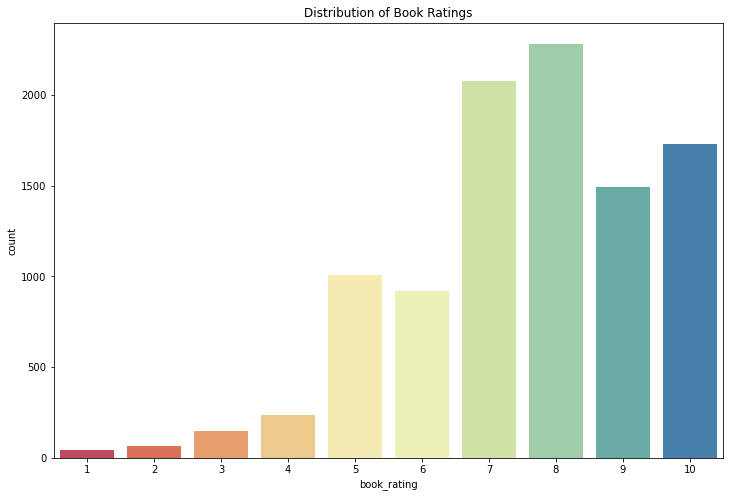

In [344]:
fig, ax = plt.subplots(figsize=(12, 8))
sns.countplot(x = 'book_rating', data = df1, palette = palette)
ax.set_title('Distribution of Book Ratings')
plt.show()

In [345]:
df1.book_title.value_counts()

Fahrenheit 451                                              5
Charlie and the Chocolate Factory                           4
The Subtle Knife (His Dark Materials, Book 2)               4
Vanished                                                    4
Ender's Game (Ender Wiggins Saga (Paperback))               4
                                                           ..
Murder on St. Mark's Place (Gaslight Mysteries)             1
State of Grace                                              1
Valsalva's Maneuver: Mots Justes and Indispensable Terms    1
I love you, I hate you                                      1
Kids Say the Darndest Things                                1
Name: book_title, Length: 9659, dtype: int64

# Introduction to surprise Package

In [346]:
df1.book_rating.unique()

array([ 5,  3,  6,  8,  7, 10,  9,  4,  1,  2], dtype=int64)

In [347]:
reader = surprise.Reader(rating_scale=(1, 10))

In [348]:
data = surprise.Dataset.load_from_df(df1[['userId', 'book_title', 'book_rating']], reader)

In [349]:
trainset, testset = train_test_split(data, test_size=.30)

# Finding the suitable algorithm for Recommendation Engine

In [350]:
bm=[]

In [351]:
for algorithm in [SVD(), SVDpp(), SlopeOne(), NMF(), NormalPredictor(), KNNBaseline(), KNNBasic(), KNNWithMeans(), BaselineOnly(), CoClustering()]:
    results = cross_validate(algorithm, data, measures=['RMSE'], cv=3, verbose=False)
    tmp = pd.DataFrame.from_dict(results).mean(axis=0)
    tmp = tmp.append(pd.Series([str(algorithm).split(' ')[0].split('.')[-1]], index=['Algorithm']))
    bm.append(tmp)

C:\Users\ompra\AppData\Local\Temp\ipykernel_13720\2311435421.py:4: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tmp = tmp.append(pd.Series([str(algorithm).split(' ')[0].split('.')[-1]], index=['Algorithm']))
C:\Users\ompra\AppData\Local\Temp\ipykernel_13720\2311435421.py:4: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tmp = tmp.append(pd.Series([str(algorithm).split(' ')[0].split('.')[-1]], index=['Algorithm']))
C:\Users\ompra\AppData\Local\Temp\ipykernel_13720\2311435421.py:4: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tmp = tmp.append(pd.Series([str(algorithm).split(' ')[0].split('.')[-1]], index=['Algorithm']))
C:\Users\ompra\AppData\Local\Temp\ipykernel_13720\2311435421.py:4: FutureWarning: The series.append met

Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.


C:\Users\ompra\AppData\Local\Temp\ipykernel_13720\2311435421.py:4: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tmp = tmp.append(pd.Series([str(algorithm).split(' ')[0].split('.')[-1]], index=['Algorithm']))
C:\Users\ompra\AppData\Local\Temp\ipykernel_13720\2311435421.py:4: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tmp = tmp.append(pd.Series([str(algorithm).split(' ')[0].split('.')[-1]], index=['Algorithm']))


Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Estimating biases using als...


C:\Users\ompra\AppData\Local\Temp\ipykernel_13720\2311435421.py:4: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tmp = tmp.append(pd.Series([str(algorithm).split(' ')[0].split('.')[-1]], index=['Algorithm']))
C:\Users\ompra\AppData\Local\Temp\ipykernel_13720\2311435421.py:4: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tmp = tmp.append(pd.Series([str(algorithm).split(' ')[0].split('.')[-1]], index=['Algorithm']))


Estimating biases using als...


C:\Users\ompra\AppData\Local\Temp\ipykernel_13720\2311435421.py:4: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tmp = tmp.append(pd.Series([str(algorithm).split(' ')[0].split('.')[-1]], index=['Algorithm']))


In [352]:
pd.DataFrame(bm).set_index('Algorithm').sort_values('test_rmse') 

,test_rmse,fit_time,test_time
Algorithm,,,
SVDpp,1.678453,0.332265,0.015123
SVD,1.688746,0.092649,0.015410
KNNBaseline,1.704165,0.041501,0.015831
BaselineOnly,1.705801,0.022811,0.006946
KNNWithMeans,1.819525,0.032991,0.012074
SlopeOne,1.820091,0.384537,0.020852
KNNBasic,1.822907,0.015653,0.015657
CoClustering,1.855181,0.544960,0.013769
NMF,1.902392,0.382973,0.014762


 #SVD algorithm gave us good result for rmse, therefore, we will train and predict with SVD

#  Building the Model using surprise

In [353]:
algo= SVD()

In [354]:
algo.fit(trainset)

In [355]:
pred = algo.test(testset)

In [356]:
surprise.accuracy.rmse(pred, verbose=True)

RMSE: 1.7169


1.7169469707617047

In [357]:
def recommendation(userId):
    user = df1.copy()
    already_read = df1[df1['userId'] == userId]['book_title'].unique()
    user = user.reset_index()
    user = user[~user['book_title'].isin(already_read)]
    user['Estimate_Score']=user['book_title'].apply(lambda x: algo.predict(userId, x).est)
    #user = user.drop('title', axis = 1)
    user = user.sort_values('Estimate_Score', ascending=False)
    print(user.head(20))

# Building the Model using correlation


In [358]:
rating = pd.pivot_table(df1, index='userId', values='book_rating', columns='book_title', fill_value=0)

In [359]:
corr=np.corrcoef(rating.T)

In [360]:
book_list = list(rating)

In [361]:
import re

In [362]:
titles=[]

In [363]:
for i in range(len(book_list)):
    titles.append(book_list[i])

In [364]:
titles

[' Jason, Madison &amp',
 ' Other Stories;Merril;1985;McClelland &amp',
 ' Repairing PC Drives &amp',
 "'48",
 "'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities",
 '...AND THE HORSE HE RODE IN ON : THE PEOPLE V. KENNETH STARR',
 '01-01-00: A Novel of the Millennium',
 '1,401 More Things That P*Ss Me Off',
 '10 Commandments Of Dating',
 '100 Great Fantasy Short, Short Stories',
 '1001 Brilliant Ways to Checkmate',
 '101 Bright Ideas: Esl Activities for All Ages',
 '101 Dalmatians',
 '101 Essential Tips: House Plants',
 '101 Telephone Jokes',
 '101 Wacky Computer Jokes',
 '101 Ways to Make Money at Home',
 '11 Edward Street',
 '11th Hour',
 '13 99 Euros',
 '14,000 Things to Be Happy About',
 '1984',
 '1st to Die: A Novel',
 '20 Jahre 40 bleiben. Jung und schÃ?Â¶n in den besten Jahren.',
 '20 Years of Censored News',
 '20,000 Leagues Under the Sea (Wordsworth Collection)',
 '20,001 Names for Baby',
 '2001 Spanish and English Idioms/2001 Modismos Espanoles E Ingleses: 

In [365]:
def get_recommendation(books_list):
    book_similarities = np.zeros(corr.shape[0])
    
    for book in books_list:
        book_index = titles.index(book)
        book_similarities += corr[book_index] 
        book_preferences = []
    for i in range(len(titles)):
        book_preferences.append((titles[i],book_similarities[i]))
        
    return sorted(book_preferences, key= lambda x: x[1], reverse=True)

# Model Output

In [366]:
recommendation(118605)  ##You can enter any User ID and get the recommendation and estimated score.


      index  userId                                         book_title  \
3898   3898    1309                                           The Gift   
6763   6763    3538                                           The Gift   
3727   3727    1155                                         2nd Chance   
788     788  277427                                         2nd Chance   
1942   1942  278418                          Instances of the Number 3   
1722   1722  278202                Something Under the Bed Is Drooling   
594     594  277246                                        Chosen Prey   
3253   3253     735                                        Chosen Prey   
3916   3916    1348                                           Stardust   
5699   5699    2576                                           Stardust   
8350   8350  160926                                           Stardust   
4313   4313    1733                                           Stardust   
5585   5585    2442                   

In [367]:
my_fav_books = ['Ashes to Ashes','Black Fire']

In [368]:
print('The books you might like: \n' , get_recommendation(my_fav_books)[:10])

The books you might like: 
 [("Arrow's Fall", 0.9995414947271895), ("Arrow's Flight (Heralds of Valdemar)", 0.9995414947271895), ('Arrows of the Queen (Heralds of Valdemar)', 0.9995414947271895), ('Oathbound (Lackey, Mercedes. Vows and Honor, Bk. 1.)', 0.9995414947271895), ('Oathbreakers (Lackey, Mercedes. Vows and Honor, Bk. 2.)', 0.9995414947271895), ('Wrongful Death', 0.9995414947271895), ('A Sorrow in Our Heart: The Life of Tecumseh', 0.9995414947271893), ('Area 7', 0.9995414947271893), ('Black Fire', 0.9995414947271893), ('Blackfire (Star Trek, No 8)', 0.9995414947271893)]
